16/16 [==============================] - 0s 387us/step


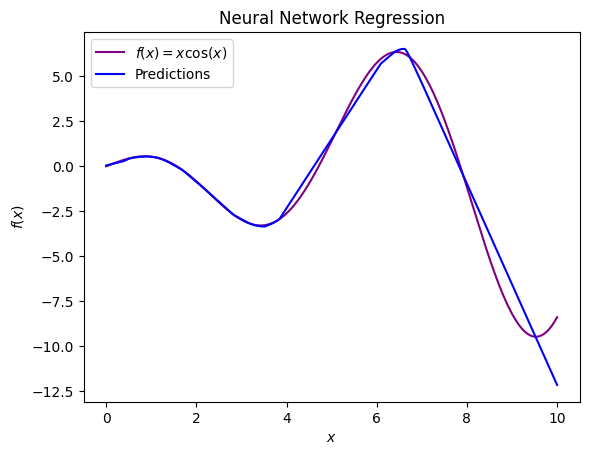

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Generate x-axis values from 0 to 10 with 99999 points and reshape it to a column vector
axis = np.linspace(start=0, stop=10, num=500).reshape(-1, 1)

# Generate corresponding y-axis values using the function f(x) = x * cos(x)
ordinate = np.squeeze(axis * np.cos(axis))

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the generated data
model.fit(axis, ordinate, epochs=100, verbose=0)  # You can adjust the number of epochs

# Make predictions using the trained model
predictions = model.predict(axis)

# Plot the original function and predictions
plt.plot(axis, ordinate, label=r"$f(x) = x\cos(x)$", linestyle="solid", color="purple")
plt.plot(axis, predictions, label="Predictions", color="blue")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Neural Network Regression")
plt.show()

16/16 [==============================] - 0s 432us/step


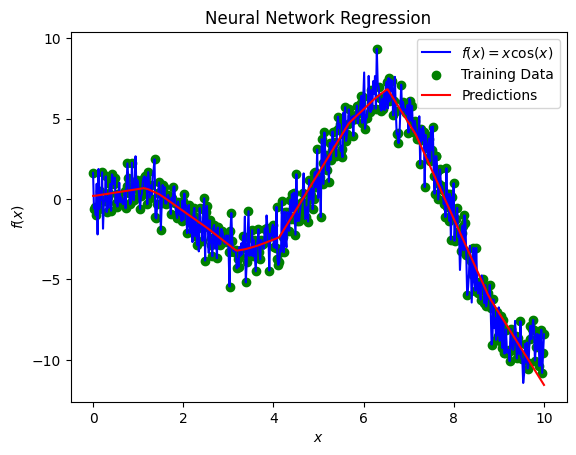

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Define the original function f(x) = x * cos(x)
def original_function(x):
    return x * np.cos(x)

# Generate synthetic data
np.random.seed(1)
axis = np.linspace(0, 10, 500)  # X values
ordinate = original_function(axis) + np.random.randn(500)  # Y values with some noise

# Split data into training and testing sets
trainAxis, testAxis, trainOrdinate, testOrdinate = train_test_split(axis, ordinate, test_size=0.2, random_state=1)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the training data
model.fit(trainAxis, trainOrdinate, epochs=500, verbose=0)  # You can adjust the number of epochs

# Make predictions using the trained model
predictions = model.predict(axis)

# Plot the original function, training data, and predictions
plt.plot(axis, ordinate, label=r"$f(x) = x\cos(x)$", linestyle="solid", color="blue")
plt.scatter(trainAxis, trainOrdinate, label="Training Data", color="green")
plt.plot(axis, predictions, label="Predictions", color="red")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Neural Network Regression")
plt.show()
